In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split

In [46]:
cancer = load_breast_cancer()


In [47]:
df = pd.DataFrame(cancer["data"],columns= cancer["feature_names"])

In [48]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [49]:
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

In [50]:
dataset = pd.DataFrame(np.c_[cancer["data"],cancer["target"]],columns= np.append(cancer["feature_names"],["target"]))

In [51]:
x = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=42)

In [55]:
s = StandardScaler()
x_train = s.fit_transform(x_train)
x_test = s.transform(x_test)

In [56]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 25,metric = "minkowski",p=2)
classifier.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=25)

0.9473684210526315


[[39  4]
 [ 2 69]]


<Axes: >

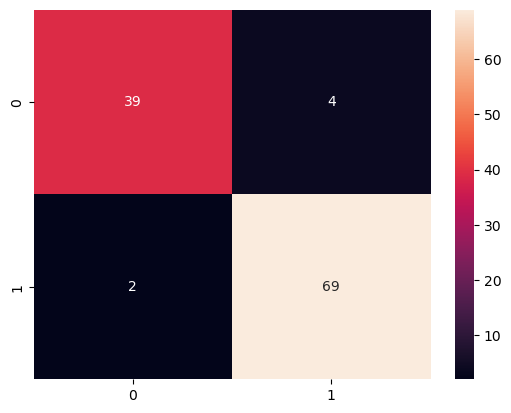

In [58]:
cm = confusion_matrix(y_test,y_pred)
print(cm)
sns.heatmap(cm,annot=True)

In [59]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

In [60]:
best_params = {
    'n_estimators': [100, 200,300],
    'max_depth': [None,10,20,30],
    'min_samples_split': [2,3,5,10],
    'min_samples_leaf': [1,2,4],
    'max_features': ['auto','sqrt', 'log2']
}

In [62]:
from sklearn.model_selection import RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=model, param_distributions=best_params,scoring = 'accuracy' , cv=5, n_jobs=-1, verbose=2)
random_search.fit(x_train , y_train)
best_para = random_search.best_params_
best_score = random_search.best_score_
print(best_para)
print(best_score)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\bojja\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
15 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\bojja\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bojja\anaconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\bojja\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\bojja\anaconda3\Lib\site-packages\s

{'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 20}
0.9582417582417582


In [63]:
from sklearn.model_selection import GridSearchCV

In [64]:
grid_search = GridSearchCV(estimator=model,param_grid=best_params,scoring = "accuracy",cv=5,n_jobs=-1,verbose=2)

grid_search.fit(x_train,y_train)
best_parameters=grid_search.best_params_
print("Best parameters:",best_parameters)

best_score = grid_search.best_score_
print("Best score:",best_score)

                        

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


C:\Users\bojja\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
720 fits failed out of a total of 2160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
510 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\bojja\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bojja\anaconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\bojja\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\bojja\anaconda3\Lib\site-packa

Best parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 100}
Best score: 0.9648351648351647
